In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import geopandas as gpd
%matplotlib inline

In [2]:
def isfloat(num):
    if num == "nan":
        return False
    try:
        float(num)
        return True
    except ValueError:
        return False


def convertToNumber(strVal):
    lowerStrVal = str(strVal).lower()
#     print("original value", lowerStrVal)
    if lowerStrVal.endswith("/week"):
        return int(float(strVal[0:len(strVal)-5]) * 52 + float(strVal[0:len(strVal)-5]) / 7)
    elif lowerStrVal.endswith("-115k"):
        return int(strVal[0:len(strVal)-5])
    elif lowerStrVal.endswith("k"):
        return int(float(strVal[0:len(strVal)-1]) * 1000)
    elif lowerStrVal.endswith("/h"):
        return int(float(strVal[0:len(strVal)-2])* 8 * 22 * 12)
    elif lowerStrVal.endswith("/month"):
        return int(float(strVal[0:len(strVal)-6]) * 12)
    elif lowerStrVal.endswith("/year"):
        return int(strVal[0:len(strVal)-5])
    elif isfloat(lowerStrVal):
        return int(float(lowerStrVal))
    else:
        return 0
    
def standardizeString(val):
    strVal = str(val)
    return strVal.title()

def capitalString(val):
    strVal = str(val)
    return strVal.upper()

def convertCadToUsd(cadVal):
    usdVal = int(cadVal * 0.78)
    return usdVal


In [3]:
# read csv file
csv_data_path = "./salary_infomation.csv"
salary = pd.read_csv(csv_data_path)

salary

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160k,300k,0,40k,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154k,181k,15%,15k,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160k,187500,15%,16k,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236K,750k,0,70k,full,IC & L4,MS,False,4y,NaN
4,FaceBook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168k,330k,10%,75k,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170k,275k,25.5k,50k,full,L4,PHD,True,0y,Return Offer
309,google,2021 4th quarter,Software Engineer,Bay Area,155k,140k,15%,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,73.3k,60k,10%,12.5k,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155k,365k,0,36.5k,full,L5,PHD,True,0y,Return Offer


In [4]:
# Data Cleaning 1

salaryInfo = salary

for index, row in salaryInfo.iterrows():
    #print(row)
    salaryInfo.at[index, 'Company'] = standardizeString(row['Company'])
    salaryInfo.at[index, 'Job'] = standardizeString(row['Job'])
    salaryInfo.at[index, 'Area'] = standardizeString(row['Area'])
    salaryInfo.at[index, 'Education'] = capitalString(row['Education'])

    baseVal = convertToNumber(row['Base'])
    equityVal = convertToNumber(row['Equity'])
    signOnVal = convertToNumber(row['Sign-on'])

    if row["Area"] == "Canada":
        baseVal = convertCadToUsd(baseVal)
        equityVal = convertCadToUsd(equityVal)
        signOnVal = convertCadToUsd(signOnVal)

    salaryInfo.at[index, 'Base'] = baseVal
    salaryInfo.at[index, 'Equity'] = equityVal
    salaryInfo.at[index, 'Sign-on'] = signOnVal
    
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,15%,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,15%,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,330000,10%,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,275000,25.5k,50000,full,L4,PHD,True,0y,Return Offer
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,140000,15%,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,46800,10%,9750,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,365000,0,36500,full,L5,PHD,True,0y,Return Offer


In [5]:
# Data Cleaning 2
# Apply bonus

def f(row):
    bonus = row["Bonus"]

    if isfloat(bonus):
        return 0
    if bonus == "0":
        bonus = 0
    elif bonus.endswith('k'):
        kb = bonus.split("k")
        #print(kb)
        bonus = int(float(kb[0]) * 1000)
    elif bonus.endswith("%"):
        base = int(row["Base"])
        if len(bonus) > 2:
            pb = bonus.split("-")
            #print(pb)
            b = int(pb[0][:2])
        else:
            b = int(bonus[0])
        bonus = base * b // 100
    else:
        bonus = 0
    
    return bonus

salaryInfo["Bonus"] = salaryInfo.apply(f, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,300000,0,40000,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,181000,23100,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,187500,24000,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,750000,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,330000,16800,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,275000,25500,50000,full,L4,PHD,True,0y,Return Offer
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,140000,23250,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,46800,5717,9750,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,365000,0,36500,full,L5,PHD,True,0y,Return Offer


In [6]:
# Data Cleaning 3 
# apply equity // 3.5
def e(row):
    equity = row["Equity"]
    equity = equity // 3.5
    return equity

salaryInfo["Equity"] = salaryInfo.apply(e, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5 y,NaN
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer


In [7]:
# Data Cleaning 4
# Creating a new column named Total

def getPackage(row):
    package = 0
    base = row['Base']
    bonus = row['Bonus']
    equity = row['Equity']
    sign = row['Sign-on']
    package += base + bonus + equity + sign
    return package

salaryInfo["Total"] = salaryInfo.apply(getPackage, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return,Total
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5 y,NaN,285714.0
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN,243814.0
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN,253571.0
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN,520285.0
4,Facebook,2021 4th quarter,Machine Learning Engineering,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN,354085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Eng,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer,324071.0
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer,218250.0
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer,86012.0
311,Amazon,2021 4th quarter,Machine Learning Eng,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer,295785.0


In [8]:
# What jobs are included?

salaryInfo['Job'].unique()

#Machine Learning Engineering and Machine Learning Eng are same. 

array(['Software Engineer', 'Data Science',
       'Machine Learning Engineering', 'Front End Engineer',
       'Hardware Engineer', 'Engineering Manager', 'Machine Learning Eng'],
      dtype=object)

In [9]:
# Data Cleaning 5
# Merge Machine Learning Engineering and Machine Learning Eng

def jobMerge(row):
    job = row["Job"]
    if job.endswith("Engineering") or job.endswith("Eng"):
        job = "Machine Learning Engineer"

    return job

salaryInfo["Job"] = salaryInfo.apply(jobMerge, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return,Total
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5 y,NaN,285714.0
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN,243814.0
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN,253571.0
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN,520285.0
4,Facebook,2021 4th quarter,Machine Learning Engineer,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN,354085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Engineer,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer,324071.0
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer,218250.0
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer,86012.0
311,Amazon,2021 4th quarter,Machine Learning Engineer,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer,295785.0


In [10]:
salaryInfo["Working Experience"].unique()

array(['2.5 y', '3y', '1.3y', '4y', '0y', '2y', '10y', '6.5y', '2.5y',
       '6y', '2.2y', '7y', '5y', '15y', '8y', '1Y', '0Y', '3.5y', '1.5y',
       '11y', '5.5y', '1y', '1.4y', '18y', '0k'], dtype=object)

In [11]:
# Data Cleaning 6
# Working Experience included Y, y, k, and " y".  Need to clean to "ny". 

def y(row):
    we = row["Working Experience"]
    we = we.replace(" ", "")
    if we.endswith("Y") or we.endswith("k"):
        we = we[: len(we) - 1] + 'y'

    return we

salaryInfo["Working Experience"] = salaryInfo.apply(y, axis=1)
salaryInfo

,Company,Offer Time,Job,Area,Base,Equity,Bonus,Sign-on,Full Time/Intern,Title/Level,Education,New Grad,Working Experience,Return,Total
0,Oracle,2021 4th quarter,Software Engineer,Great Seattle Area,160000,85714.0,0,40000,full,IC & IC3,MS,False,2.5y,NaN,285714.0
1,Chewy,2021 4th quarter,Software Engineer,Great Seattle Area,154000,51714.0,23100,15000,full,IC& SDE II,MS,False,3y,NaN,243814.0
2,Adobe,2021 4th quarter,Data Science,Bay Area,160000,53571.0,24000,16000,full,IC &DS II,MS,False,1.3y,NaN,253571.0
3,Wish,2021 4th quarter,Software Engineer,Great Seattle Area,236000,214285.0,0,70000,full,IC & L4,MS,False,4y,NaN,520285.0
4,Facebook,2021 4th quarter,Machine Learning Engineer,Great Seattle Area,168000,94285.0,16800,75000,full,IC& E4,PHD,True,0y,NaN,354085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,Waymo,2021 4th quarter,Machine Learning Engineer,Bay Area,170000,78571.0,25500,50000,full,L4,PHD,True,0y,Return Offer,324071.0
309,Google,2021 4th quarter,Software Engineer,Bay Area,155000,40000.0,23250,0,full,L4,PHD,True,1y,Return Offer,218250.0
310,Workday,2021 4th quarter,Software Engineer,Canada,57174,13371.0,5717,9750,full,associate,BS,True,1y,Return Offer,86012.0
311,Amazon,2021 4th quarter,Machine Learning Engineer,Great Seattle Area,155000,104285.0,0,36500,full,L5,PHD,True,0y,Return Offer,295785.0


In [12]:
# Job merge successed 
salaryInfo["Job"].unique()


array(['Software Engineer', 'Data Science', 'Machine Learning Engineer',
       'Front End Engineer', 'Hardware Engineer', 'Engineering Manager'],
      dtype=object)

In [13]:
# calculate sum of different jobs
ts = (salaryInfo['Job']).size
fs = (salaryInfo['Job'] == 'Front End Engineer').sum()
hs = (salaryInfo['Job'] == 'Hardware Engineer').sum()
managers = (salaryInfo['Job'] == 'Engineering Manager').sum()
ss = (salaryInfo['Job'] == 'Software Engineer').sum()
mls = (salaryInfo['Job'] == 'Machine Learning Engineer').sum()
dss = (salaryInfo['Job'] == 'Data Science').sum()

print('Total Jobs = ', ts)
print("Front Sum = ", fs)
print("Hardware Sum = ", hs)
print("Manager Sum = ", managers)
print("Software Sum = ", ss)
print('Machine Learning Sum = ', mls)
print('Data Science = ', dss)


Total Jobs =  313
Front Sum =  4
Hardware Sum =  3
Manager Sum =  1
Software Sum =  237
Machine Learning Sum =  32
Data Science =  36


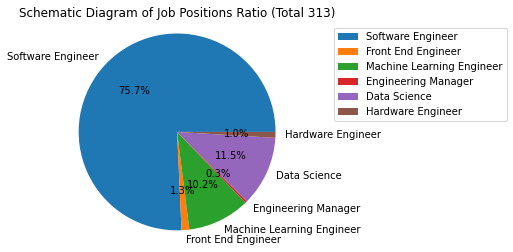

In [14]:
# Generate a pie chart of jobs ratio

jobs = ['Software Engineer','Front End Engineer','Machine Learning Engineer',
        'Engineering Manager', 'Data Science','Hardware Engineer']
numbers_of_job = [ss, fs, mls, managers, dss, hs]
plt.pie(numbers_of_job, labels=jobs, autopct='%1.1f%%')
plt.title('Schematic Diagram of Job Positions Ratio (Total 313)')
plt.axis('equal') 
plt.legend(bbox_to_anchor=(1.0, 0.8, 0.5, 0.2), loc = 'upper right')
plt.savefig('./figures/JobRatio.png', bbox_inches='tight')

In [15]:
def getMean(column):
    count = (column != 0).sum()
    column_sum = column.sum()
    mean = column_sum / count
    
    return mean

In [16]:
# How many Education types 

salaryInfo['Education'].unique()

array(['MS', 'PHD', 'BS'], dtype=object)

In [17]:
# catagories of different Education background

ms = salaryInfo[salaryInfo['Education']=="MS"]
phd = salaryInfo[salaryInfo['Education'] == 'PHD']
bs = salaryInfo[salaryInfo['Education'] == 'BS']

In [18]:
# calculate means of Total based on different Education
ms_tmean = ms['Total'].mean()
phd_tmean = phd['Total'].mean()
bs_tmean = bs['Total'].mean()

# calculate means of Base based on different Education
ms_base_mean = ms['Base'].mean()
bs_base_mean = bs['Base'].mean()
phd_base_mean = phd['Base'].mean()

# calculate means of Bonus based on different Education
msb = ms['Bonus'].dropna()
ms_bonus_mean = getMean(msb)

bsb = bs['Bonus'].dropna()
bs_bonus_mean = getMean(bsb)

phdb = phd['Bonus'].dropna()
phd_bonus_mean = getMean(phdb)

#print(ms_bonus_mean, bs_bonus_mean, phd_bonus_mean)

# calculate means of Equity based on different Education
mse = ms['Equity'].dropna()
ms_equity_mean = getMean(mse)

bse = bs['Equity'].dropna()
bs_equity_mean = getMean(bse)

phde = phd['Equity'].dropna()
phd_equity_mean = getMean(phde)

#print(ms_equity_mean, bs_equity_mean, phd_equity_mean)

# calculate means of Sign-on based on different Education
msso = ms["Sign-on"].dropna()
ms_signon_mean = getMean(msso)

bsso = bs["Sign-on"].dropna()
bs_signon_mean = getMean(bsso)

phdso = phd["Sign-on"].dropna()
phd_signon_mean = getMean(phdso)

#print(ms_signon_mean, bs_signon_mean, phd_signon_mean)

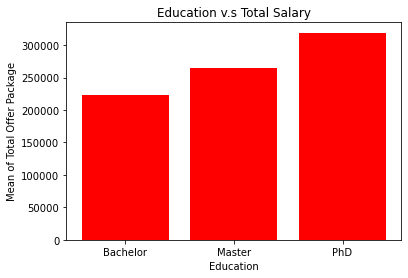

In [19]:
# Getting bar chart of total means of different education backgrounds 

means = [bs_tmean, ms_tmean, phd_tmean]
educations = ['Bachelor', 'Master', 'PhD']
fig = plt.figure()
plt.bar(educations, means, color = 'r')
plt.title('Education v.s Total Salary')
plt.xlabel('Education')
plt.ylabel('Mean of Total Offer Package')
fig.savefig('./figures/EducationSalary1.png', bbox_inches='tight')

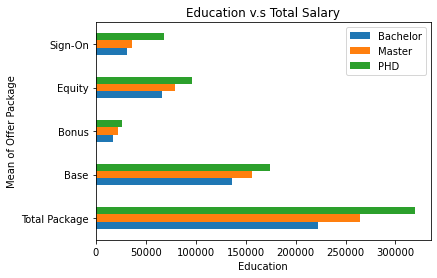

In [20]:
# Getting bar chart of every catagories' means of different education backgrounds 
#print(phd_tmean, phd_base_mean, phd_bonus_mean, phd_equity_mean, phd_signon_mean)

df = pd.DataFrame()
df['Bachelor'] =[bs_tmean, bs_base_mean, bs_bonus_mean, bs_equity_mean, bs_signon_mean]
df['Master'] = [ms_tmean, ms_base_mean, ms_bonus_mean, ms_equity_mean, ms_signon_mean]
df['PHD'] = [phd_tmean, phd_base_mean, phd_bonus_mean, phd_equity_mean, phd_signon_mean]

ind = np.arange(5)
df.plot(kind = 'barh')
plt.title('Education v.s Total Salary')
plt.xlabel('Education')
plt.ylabel('Mean of Offer Package')
plt.yticks(ind, ('Total Package', 'Base', 'Bonus', 'Equity', 'Sign-On'))
plt.savefig('./figures/EducationSalary2.png', bbox_inches='tight')

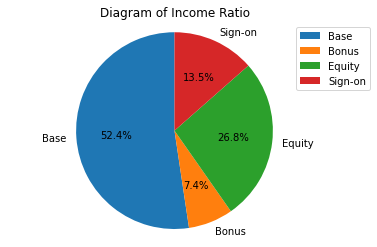

In [21]:
# The composition of income
# Expected to be a pie chart: Base, Equality(3 or 4 years), bonus, sign-on

allbase = salaryInfo["Base"].dropna()
allbase_mean = getMean(allbase)

allbonus = salaryInfo["Bonus"].dropna()
allbonus_mean = getMean(allbonus)

allequity = salaryInfo["Equity"].dropna()
allequity_mean = getMean(allequity)

allsignon = salaryInfo["Sign-on"].dropna()
allsignon_mean = getMean(allsignon)

income = ['Base', 'Bonus', 'Equity', 'Sign-on']
mean_each = [allbase_mean, allbonus_mean, allequity_mean, allsignon_mean]
plt.pie(mean_each, labels=income, autopct='%1.1f%%', startangle = 90)
plt.title('Diagram of Income Ratio')
plt.axis('equal') 
plt.legend(bbox_to_anchor=(0.6, 0.8, 0.5, 0.2), loc = 'upper right')
plt.savefig('./figures/IncomeRatio.png', bbox_inches='tight')

In [22]:
#Different range of total income may result in different ratio of Base/Bonus/Equity/Sign-on
#Excepted to be 3 pie charts with 3 ranges of total income

#0 - 200k
#200k - 400k
#400k +

full = salaryInfo[salaryInfo["Full Time/Intern"] == "full"]
below_20 = full[full["Total"] < 200000]
below_20_base = below_20["Base"].mean()
below_20_bonus = getMean(below_20["Bonus"].dropna())
below_20_eq = getMean(below_20["Equity"].dropna())
below_20_s = getMean(below_20["Sign-on"].dropna())

between_20to_40 = full[(full["Total"] >= 200000) & (full["Total"] < 400000)]
between_20to_40_base = between_20to_40["Base"].mean()
between_20to_40_bonus = getMean(between_20to_40["Bonus"].dropna())
between_20to_40_eq = getMean(between_20to_40["Equity"].dropna())
between_20to_40_s = getMean(between_20to_40["Sign-on"].dropna())

over40 = full[full["Total"] > 400000]
over40_base = over40["Base"].mean()
over40_bonus = getMean(over40["Bonus"].dropna())
over40_eq = getMean(over40["Equity"].dropna())
over40_s = getMean(over40["Sign-on"].dropna())


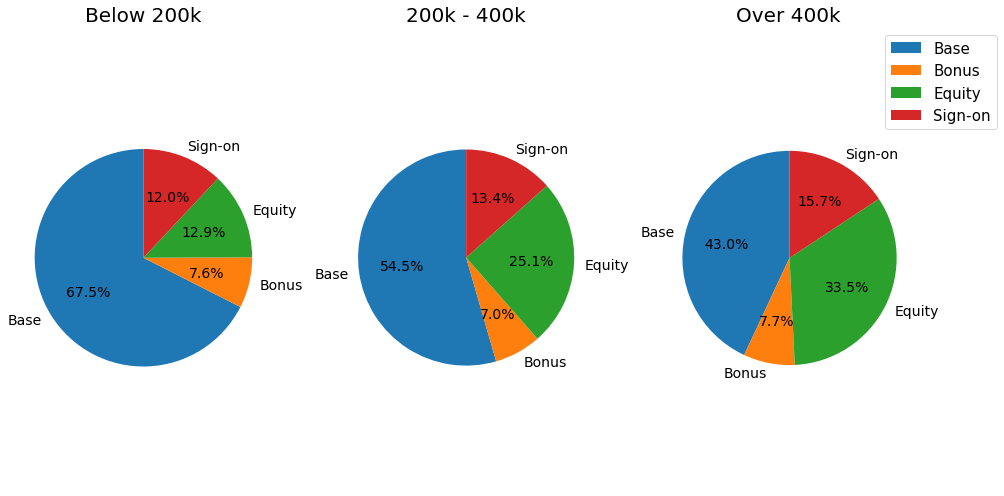

In [23]:
b2 = [below_20_base, below_20_bonus, below_20_eq, below_20_s]
b24 = [between_20to_40_base, between_20to_40_bonus, between_20to_40_eq, between_20to_40_s]
o4 = [over40_base, over40_bonus, over40_eq, over40_s]
labels = ("Base", "Bonus", "Equity", "Sign-on")

fig = plt.figure(figsize = (14, 7))
ax1 = plt.subplot(1,3,1)
ax1.pie(b2, labels=labels, autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('Below 200k', fontsize=20)

ax1 = plt.subplot(1,3,2)
ax1.pie(b24, labels=labels, autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('200k - 400k', fontsize=20)

ax1 = plt.subplot(1,3,3)
ax1.pie(o4, labels=labels, autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 14})
ax1.axis('equal')
ax1.set_title('Over 400k', fontsize=20)
ax1.legend(labels, bbox_to_anchor=(1.2, 0.8, 0.2, 0.2), prop={'size': 15})


fig.tight_layout()
fig.savefig('./figures/IncomeRangesRatio.png', bbox_inches='tight')


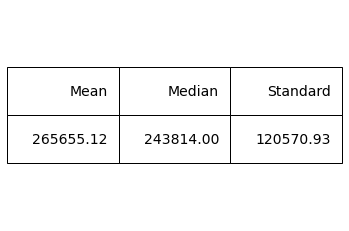

In [24]:
# The mean/median/std of total income.
# Expected to be a table

tmean = format(salaryInfo["Total"].mean(), '.2f')
tmedian = format(salaryInfo["Total"].median(), '.2f')
tstd = format(salaryInfo["Total"].std(), '.2f')

# Generate table
#define figure and axes
fig, ax = plt.subplots()
#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#create data
table_data=[['Mean','Median','Standard'],[tmean, tmedian, tstd]]

table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(1,4)
ax.axis('off')
plt.savefig('./figures/MeanMedianStd.png', bbox_inches='tight')

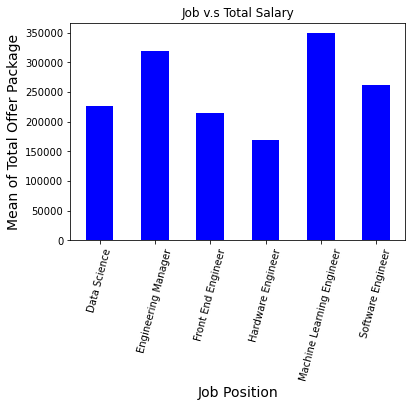

In [25]:
# Job comparison chart
# Jobs included: Mean of Software Engineer, mean of Data Scientist, mean of Machine Learning.

jobs = ['Data Science', 'Engineering Manager', 'Front End Engineer', 'Hardware Engineer',
       'Machine Learning Engineer', 'Software Engineer']
average = salaryInfo.groupby('Job').Total.mean()

fig = plt.figure()
plt.bar(jobs, height = average, color = 'b', width = 0.5)
plt.title('Job v.s Total Salary')
plt.xlabel('Job Position', fontsize=14)
plt.xticks(rotation=75)
plt.ylabel('Mean of Total Offer Package', fontsize=14)
fig.savefig('./figures/JobSalary.png', bbox_inches='tight')


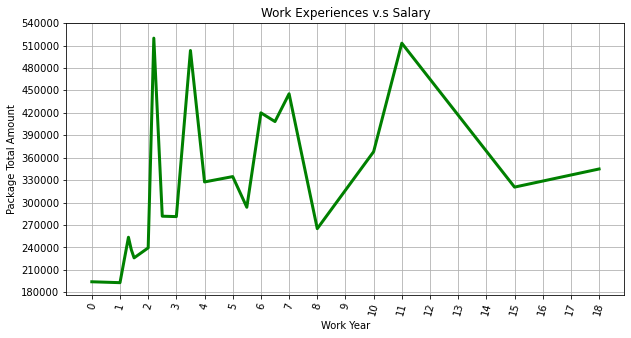

In [26]:
# Working Experience v.s. Salary
# Expected to be a line chart or scattered dots

we = salaryInfo[salaryInfo["Full Time/Intern"] == "full"]
wedu = we['Education']
we = salaryInfo['Working Experience'].unique()
we = sorted(we)
average_y = salaryInfo.groupby('Working Experience').Total.mean()
work_salary = []
wy = []
ws = []
wedus = []
for y, s, edu in zip(*(we, average_y, wedu)):
    y = float(y[:len(y) - 1])
    s = float(format(s, ".2f"))
    work_salary.append((y, s, edu))
work_salary = sorted(work_salary, key = lambda x:x[0])

for w in work_salary:
    wy.append(w[0])
    ws.append(w[1])
    wedus.append(w[2])

plt.figure(figsize=(10,5))
plt.plot(wy, ws,'g',linewidth = 3)
plt.title('Work Experiences v.s Salary')
plt.xlabel("Work Year")
plt.ylabel("Package Total Amount")
x_tix = np.arange(0,19)
plt.xticks(x_tix, rotation=75)
y_tix = np.arange(180000,550000, 30000)
plt.yticks(y_tix)
plt.grid()
plt.savefig('./figures/WorkSalary.png', bbox_inches='tight')

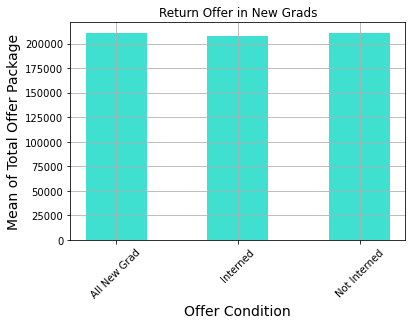

In [27]:
# New Grad return offer vs normal
# The comparison between return offer and normal. 
# Will the employees who were interned in the company be offered a higher salary?
fulltime = salaryInfo[salaryInfo["Full Time/Intern"] == "full"]
newgrad = fulltime[fulltime["New Grad"] == True] # (103 new grads)
returned = newgrad[newgrad["Return"] == "Return Offer"] # (29 return offer)
normal = newgrad[newgrad["Return"].isna()] # (74 normal offer)

newgrad_mean = newgrad['Total'].mean()
returned_mean = returned['Total'].mean()
normal_mean = normal['Total'].mean()
# print(newgrad_mean, returned_mean, normal_mean)
news = ['All New Grad', 'Interned', 'Not Interned']
new_means = [newgrad_mean, returned_mean, normal_mean]

plt.bar(news, new_means, color = 'turquoise', width = 0.5)
plt.title('Return Offer in New Grads')
plt.xlabel('Offer Condition', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Mean of Total Offer Package', fontsize=14)
plt.grid()
plt.savefig('./figures/ReturnOffer.png', bbox_inches='tight')

In [28]:
# Best offer companies vs lowest offer companies for new grad(top 5 vs bottom 5)
# Expected to be a bar chart
offers = newgrad.groupby(["Company", "Education", "Total"]).groups
new_offers = []
for k in offers.keys():
    new_offers.append(k)
new_offers = sorted(new_offers, key = lambda x: x[2])
bottom5 = new_offers[1:11]
bcompany = {}
for c in bottom5:
    bcompany[c[0]] = bcompany.get(c[0], 0) + 1
    
tcompany = {}
top5 = new_offers[len(new_offers) - 10:]
for a in top5:
    tcompany[a[0]] = tcompany.get(a[0], 0) + 1
#print(tcompany, bcompany)

blabels = []
bsizes = []

for k,v  in bcompany.items():
    blabels.append(k)
    bsizes.append(v)
    
tlabels = []
tsizes = []
for k,v  in tcompany.items():
    tlabels.append(k)
    tsizes.append(v)

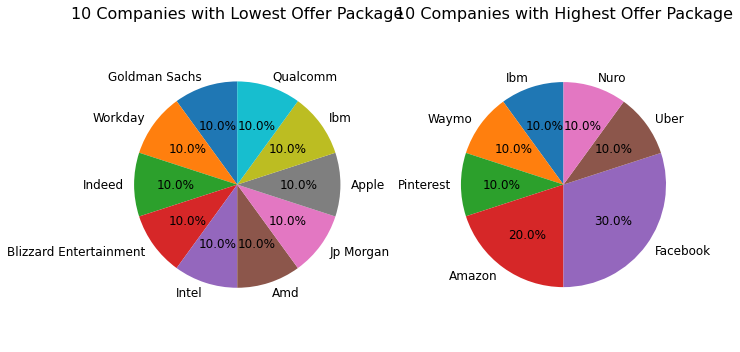

In [29]:
fig = plt.figure(figsize = (10,5))

ax1 = plt.subplot(1,2,1)
ax1.pie(bsizes, labels=blabels, autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 12})
ax1.axis('equal')
ax1.set_title('10 Companies with Lowest Offer Package', fontsize=16)

ax1 = plt.subplot(1,2,2)
ax1.pie(tsizes, labels=tlabels, autopct='%1.1f%%', startangle = 90, textprops={'fontsize': 12})
ax1.axis('equal')
ax1.set_title('10 Companies with Highest Offer Package', fontsize=16)
fig.tight_layout()
fig.savefig('./figures/TopAndBottom10.png', bbox_inches='tight')

In [30]:
allfull = full.groupby(["Company","Job","Area","Education","Working Experience","Total"]).groups
allfull_list = []
for item in allfull:
    allfull_list.append(item)
allfull_list = sorted(allfull_list, key = lambda x: x[5])[::-1]
top5p = allfull_list[:14]

cd = {}
jd = {}
ad = {}
ed = {}
wed = {}

for item in top5p:
    cd[item[0]] = cd.get(item[0], 0) + 1
    jd[item[1]] = jd.get(item[1], 0) + 1
    ad[item[2]] = ad.get(item[2], 0) + 1
    ed[item[3]] = ed.get(item[3], 0) + 1
    wed[item[4]] = wed.get(item[4], 0) + 1
#print(ed)
cdm = max(cd, key = cd.get)
jdm = max(jd, key = jd.get)
adm = max(ad, key = ad.get)
edm = max(ed, key = ed.get)
wedm = max(wed, key = wed.get)
#print(cdm, jdm, adm,edm)

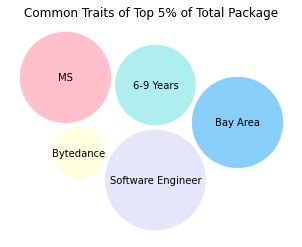

In [31]:
import numpy as np
import matplotlib.pyplot as plt

keywords = {
    'words': ['Bytedance', 'Software Engineer', 'Bay Area', 'MS','6-9 Years'],
    'ooccurrence': [3.0,11.0,9.0,9.0,7.0],
    'color': ['lightyellow', 'lavender','lightskyblue', 'pink', 'paleturquoise']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area= keywords['ooccurrence'], bubble_spacing=0.2)

bubble_chart.collapse()
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))

bubble_chart.plot(
    ax, keywords['words'], keywords['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Common Traits of Top 5% of Total Package')
fig.savefig('./figures/CommonTraits.png', bbox_inches='tight')
#plt.show()

In [32]:
# Area comparison chart
# Areas included: Bay Area, Seattle, New York, Boston, Texas, Canada, Other Area
# Expected to be a map

#states = geopandas.read_file('data/usa-states-census-2014.shp')
#states.crs
#states = states.to_crs("EPSG:3395")
#states.boundary.plot()

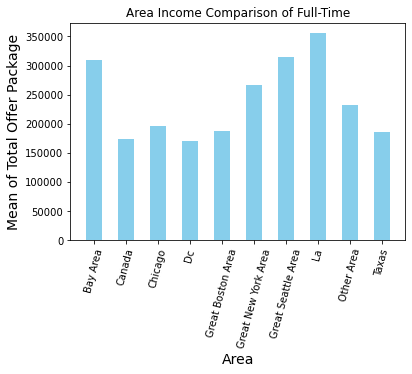

In [33]:
fulltime1 = salaryInfo[salaryInfo["Full Time/Intern"] == "full"]

Area = ['Bay Area', 'Canada', 'Chicago',
       'Dc', 'Great Boston Area','Great New York Area','Great Seattle Area','La','Other Area', 'Taxas']

average1 = fulltime1.groupby('Area').Total.mean()
# print(average1)

fig = plt.figure()
plt.bar(Area, average1, color = 'skyblue', width = 0.5)
plt.title('Area Income Comparison of Full-Time')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Mean of Total Offer Package', fontsize=14)
plt.xticks(rotation=75)
fig.savefig('./figures/AreasIncomeFulltime.png', bbox_inches='tight')

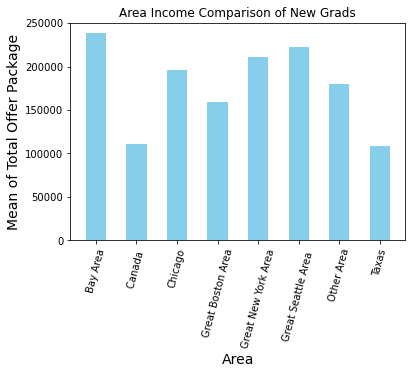

In [35]:
fulltime1 = salaryInfo[salaryInfo["Full Time/Intern"] == "full"]
newGraduate =fulltime1[fulltime1['New Grad'] == True]

Area = ['Bay Area', 'Canada ', 'Chicago', 'Great Boston Area',
       'Great New York Area', 'Great Seattle Area ','Other Area','Taxas']

average1 = newGraduate.groupby('Area').Total.mean()
# print(average1)

fig = plt.figure()
plt.bar(Area, average1, color = 'skyblue', width = 0.5)
plt.title('Area Income Comparison of New Grads')
plt.xlabel('Area', fontsize=14)
plt.ylabel('Mean of Total Offer Package', fontsize=14)
plt.xticks(rotation=75)
fig.savefig('./figures/AreasIncomeNewGrad.png', bbox_inches='tight')